# Latihan Membuat Model Klasifikasi Gambar
1. Memastikan TensorFlow yang digunakan di Google Colab adalah versi di atas 2.0.
2. Mengunduh dataset dan melakukan extract file dengan metode unzip.
3. Menampung direktori setiap kelas pada direktori train dan validasi ke dalam variabel.
4. Pre-processing data dengan image augmentation.
5. Mempersiapkan data latih yang akan dipelajari oleh model.
6. Membangun arsitektur model dengan Convolutional Neural Network (CNN).
7. Compile dan latih model dengan model.compile dan model.fit hingga mendapatkan akurasi yang diinginkan.
8. Menguji model yang telah dibuat dengan menggunakan gambar yang belum dikenali oleh model.




In [8]:
import tensorflow as tf
print(tf.__version__)

2.16.1


mengunduh dataset

In [9]:
!wget --no-check-certificate \
  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2024-03-11 12:42:42--  https://dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com/184/messy-vs-clean-room.zip
Resolving dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)... 2606:4700::6812:cc0, 2606:4700::6812:dc0, 104.18.13.192, ...
Connecting to dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com (dicoding-academy-assets.sgp1.cdn.digitaloceanspaces.com)|2606:4700::6812:cc0|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  3.41MB/s    in 19s     

2024-03-11 12:43:03 (3.45 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [10]:
# ekstrak data yang telah diunduh
import zipfile,os

# lokasi file zip yang telah diunduh
local_zip = '/tmp/messy_vs_clean_room.zip'

# membuka file zip
zip_ref = zipfile.ZipFile(local_zip, 'r')

# mengekstrak semua isi file zip ke direktori sementara (tmp)
zip_ref.extractall('/tmp')

# menutup file zip yang telah di ekstrak
zip_ref.close()

# direktori utama tempat data akan disimpan
base_dir = '/tmp/images'

# direktori data training
train_dir = os.path.join(base_dir, 'train')

# direktori data validasi
validation_dir = os.path.join(base_dir, 'val')


setiap direktori memiliki subdirektori clean dan messy
Setiap sub-direktori menyimpan gambar yang sesuai dengan nama sub-direktori tersebut.

In [11]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [12]:
os.listdir('/tmp/images/val')

['messy', 'clean']

menerapkan ImageDataGenerator untuk data latih dan data validasi (preprocessing data, pelabelan sampel otomatis, dan augmentasi gambar.)

Augmentasi gambar merupakan sebuah teknik yang dapat digunakan untuk memperbanyak data latih dengan cara menduplikasi gambar yang telah ada dengan menambahkan variasi tertentu.

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,       # rescale nilai px menjadi rentang [0,1]
    rotation_range = 20,    # rentang rotasi gambar dalam derajat
    horizontal_flip=True,   # melakukan flipping horizontal pada gambar
    shear_range=0.2,        # rentang pergerseran shear gambar
    fill_mode='nearest')    # mode pengisian px utk gambar yang terdistorsi

# membuat objek ImageDataGenerator untuk data pengujian tanpa augmentasi
test_datagen = ImageDataGenerator(rescale=1./255)

menyiapkan data training dan validasi dair kumpulan data yang di load dalam memori melalui fungsi flow()

In [14]:
train_generator = train_datagen.flow_from_directory(train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas, gunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.


In [15]:
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, 
        # karena ini merupakan masalah klasifikasi 2 kelas gunakan class_mode = 'binary'
        class_mode='binary')

Found 20 images belonging to 2 classes.


Setelah data siap, kita bisa membangun model Convolutional Neural Network (CNN). CNN memeiliki empat lapis layer konvulusi (mengekstrasi atribut pada gambar) dan max pooling (mereduksi resolusi gambar sehingga proses pelatihan model lebih mudah)

In [16]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

/Users/taliyameyswara/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [17]:
# fungsi summary() untuk melihat summary dari arsitektur model yang dibuat
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,529,665 (51.61 MB)

 Trainable params: 13,529,665 (51.61 MB)

 Non-trainable params: 0 (0.00 B)

## Penjelasan summary model
Model yang dibuat terdiri dari 4 lapis convolutional dan maxpooling layer, sebuah flatten layer, dan dua buah dense layer.

kolom "Output Shape" berisi informasi ukuran output yang dihasilkan tiap layer.

Ukuran input gambar yang telah didefinisikan sebelumnya adalah sebesar (150,150). Tapi pada convolutional layer pertama, setiap input gambar menghasilkan output (148,148) sebanyak 32 gambar. Ukuran tersebut berkurang karena kita menggunakan filter dengan ukuran (3,3) dengan jumlah filter sebanyak 32 filter. Sehingga, tiap satu input gambar akan menghasilkan 32 gambar baru dengan ukuran (148,148).

Kemudian, resolusi tiap gambar akan diperkecil dengan teteap mempertahankan informasi pada gambar menggunakan MaxPooling layer terakhir yang terdiri dari 512 gambar dengan ukuran (7,7) akan diubah ke dalam array 1D. Akan menghasilkan output berukuran 25088

Output tersebut akan masuk ke dalam dense layer pertama yang memiliki 512neuron. Sehingga ia akan menghasilkan output dengan ukuran 512. Selanjutnya output ini akan masuk pada dense layer kedua yang memiliki 1 neuron sehingga akan menghasikan output dengan ukuran 1. Output dari layer terakhir inilah yang digunakan hasil akhir model untuk kassus klasifikasi biner.

<hr>
setelah membuat model CNN, tahap selanjutnya adalah melakukan *compile model* menggunakan fungsi compile()

Pada tahap ini, menentukan *loss function* serta *optimizer* yang akan digunakan.

Loss function yang digunakan pada kasus klasifikasi biner adalah "binary_crossentropy". 

Optimizer yang digunakan adalag "Adam Optimizer" karena mudah diterapkan, lebih efisien secara komputasi dan kebutuhan memori yang lebih kecil

In [18]:
model.compile(loss='binary_crossentropy', optimizer=tf.optimizers.Adam(), metrics=['accuracy'])

tahap terkhir dari pembuatan model adalah proses model fitting (proses utk melatih model pada data masukan dan label yang bersesuaian). Masukkan daata latih pada jaringan neural network yang telah dibuat

In [19]:
# latih model dengan model.fit 
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20, # tambahkan epochs jika akurasi model belum optimal
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20


/Users/taliyameyswara/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 - 3s - 132ms/step - accuracy: 0.4300 - loss: 0.8492 - val_accuracy: 0.5000 - val_loss: 0.6936
Epoch 2/20
25/25 - 2s - 82ms/step - accuracy: 0.5109 - loss: 0.6649 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20


2024-03-11 12:43:35.414497: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/Users/taliyameyswara/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)
2024-03-11 12:43:35.422496: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 3s - 108ms/step - accuracy: 0.5100 - loss: 0.6941 - val_accuracy: 0.5000 - val_loss: 0.6918
Epoch 4/20
25/25 - 2s - 78ms/step - accuracy: 0.5000 - loss: 0.6624 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20


2024-03-11 12:43:40.064148: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-11 12:43:40.065781: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 2s - 97ms/step - accuracy: 0.5600 - loss: 0.6813 - val_accuracy: 0.6000 - val_loss: 0.6416
Epoch 6/20
25/25 - 2s - 81ms/step - accuracy: 0.5000 - loss: 0.6802 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20


2024-03-11 12:43:44.504909: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-11 12:43:44.507354: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 3s - 100ms/step - accuracy: 0.6400 - loss: 0.6523 - val_accuracy: 0.8000 - val_loss: 0.5764
Epoch 8/20
25/25 - 2s - 78ms/step - accuracy: 0.6196 - loss: 0.6145 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20


2024-03-11 12:43:48.966512: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-11 12:43:48.968371: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 2s - 96ms/step - accuracy: 0.6700 - loss: 0.5912 - val_accuracy: 0.6500 - val_loss: 0.6670
Epoch 10/20
25/25 - 2s - 80ms/step - accuracy: 0.6739 - loss: 0.6082 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 11/20


2024-03-11 12:43:53.356721: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-11 12:43:53.359121: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 3s - 103ms/step - accuracy: 0.6700 - loss: 0.6016 - val_accuracy: 0.7500 - val_loss: 0.5282
Epoch 12/20
25/25 - 2s - 86ms/step - accuracy: 0.6630 - loss: 0.6005 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 13/20


2024-03-11 12:43:58.098696: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-11 12:43:58.101413: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 2s - 95ms/step - accuracy: 0.7300 - loss: 0.5828 - val_accuracy: 0.7500 - val_loss: 0.4960
Epoch 14/20
25/25 - 2s - 77ms/step - accuracy: 0.7609 - loss: 0.4737 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 15/20


2024-03-11 12:44:02.418292: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-11 12:44:02.420178: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 2s - 96ms/step - accuracy: 0.6800 - loss: 0.6140 - val_accuracy: 0.7000 - val_loss: 0.6137
Epoch 16/20
25/25 - 2s - 78ms/step - accuracy: 0.7065 - loss: 0.5577 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 17/20


2024-03-11 12:44:06.779936: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-11 12:44:06.782027: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 2s - 93ms/step - accuracy: 0.7400 - loss: 0.6540 - val_accuracy: 0.7000 - val_loss: 0.5587
Epoch 18/20
25/25 - 2s - 76ms/step - accuracy: 0.6848 - loss: 0.5724 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 19/20


2024-03-11 12:44:11.029451: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-11 12:44:11.031085: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


25/25 - 2s - 95ms/step - accuracy: 0.6800 - loss: 0.5951 - val_accuracy: 0.7000 - val_loss: 0.5439
Epoch 20/20
25/25 - 2s - 83ms/step - accuracy: 0.7391 - loss: 0.4894 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00


2024-03-11 12:44:15.485336: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
2024-03-11 12:44:15.486984: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


Menguji model yang telah dibuat dengan menggunakan gambar yang belum dikenali oleh model.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
room1.jpg
clean


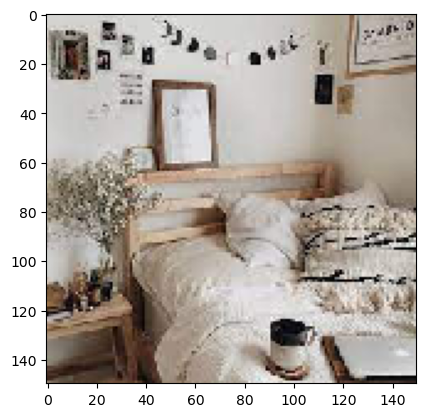

In [22]:
import numpy as np
# from google.colab import files
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
# uploaded = files.upload()
 
# for fn in uploaded.keys():
 
# predicting images
path = "room1.jpg"
img = image.load_img(path, target_size=(150,150))
 
imgplot = plt.imshow(img)
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
 
classes = model.predict(images, batch_size=10)  
print(path)
if classes==0:
    print('clean')
else:
    print('messy')